##Installing Kedro

In [ ]:
!pip install kedro

In [2]:
!kedro info

/usr/local/lib/python3.7/dist-packages/jsonschema/compat.py:6: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import MutableMapping, Sequence  # noqa

 _            _
| | _____  __| |_ __ ___
| |/ / _ \/ _` | '__/ _ \
|   <  __/ (_| | | | (_) |
|_|\_\___|\__,_|_|  \___/
v0.17.5

kedro allows teams to create analytics
projects. It is developed as part of
the Kedro initiative at QuantumBlack.

No plugins installed


##Creating a new project on kedro

In [4]:
!kedro new

/usr/local/lib/python3.7/dist-packages/jsonschema/compat.py:6: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import MutableMapping, Sequence  # noqa

Project Name:
Please enter a human readable name for your new project.
Spaces and punctuation are allowed.
 [New Kedro Project]: scania

Repository Name:
Please enter a directory name for your new project repository.
Alphanumeric characters, hyphens and underscores are allowed.
Lowercase is recommended.
 [scania]: scania

Python Package Name:
Please enter a valid Python package name for your project package.
Alphanumeric characters and underscores are allowed.
Lowercase is recommended. Package name must start with a letter
or underscore.
 [scania]: scania

Change directory to the project generated in /content/scania

A best-practice setup includes initialising git and creating a virtual environment befor

###Once you create this project, a directory will be generated with folders as shown below
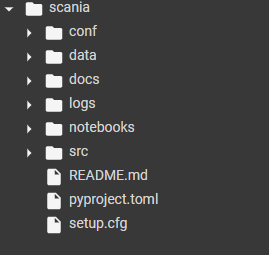

##Importing some functions

In [7]:
from kedro.pipeline import node
from kedro.pipeline import Pipeline
from kedro.io import DataCatalog, MemoryDataSet
from kedro.runner import SequentialRunner
import os

In [8]:
os.chdir('/content/scania') #changing the directory

In [ ]:
!kedro install #Installing some kedro dependencies

##Creating a new pipeline : This will create a pipeline with default kedro templates

In [10]:
!kedro pipeline create model_prediction

2021-11-02 12:31:13,833 - root - INFO - Registered CLI hooks from 1 installed plugin(s): kedro-telemetry-0.1.2
As an open-source project, we collect usage analytics. 
We cannot see nor store information contained in a Kedro project. 
You can find out more by reading our privacy notice: 
https://github.com/quantumblacklabs/kedro-telemetry#privacy-notice 
Do you opt into usage analytics?  [y/N]: y
You have opted into product usage analytics.
2021-11-02 12:31:32,560 - kedro_telemetry.plugin - INFO - You have opted into product usage analytics.
2021-11-02 12:31:32,560 - kedro_telemetry.plugin - WARNING - Something went wrong with getting the username to send to Heap. Exception: [Errno 6] No such device or address
Creating the pipeline `model_prediction`: OK
  Location: `/content/scania/src/scania/pipelines/model_prediction`
Creating `/content/scania/src/tests/pipelines/model_prediction/test_pipeline.py`: OK
Creating `/content/scania/src/tests/pipelines/model_prediction/__init__.py`: OK
Cre

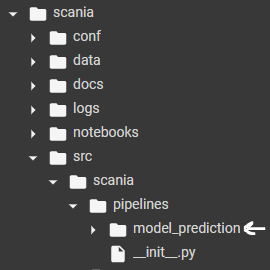

##There is a kaggle problem to predict APS failure in scania trucks. A model has been already built for this problem and the trained model is already available as a pickle file. We will build a pipeline for this model's prediction using kedro.

In [25]:
#A sneak peak into the dataset
data = pd.read_csv('/content/scania/data/01_raw/sample_data.csv')
data.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,...,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,1800546,na,na,13042,na,na,0,280,132164,7875494,55386332,92749198,52130878,16496844,1901366,28480,82073576,196142,0,na,986196,1957344,149868570,115528598,84129814,34558772,na,0,0,0,na,na,0,0,0,0,0,0,0,28112774,...,0,72195158,na,na,na,na,na,na,na,na,na,na,1948124,na,na,na,na,na,na,na,na,na,na,na,na,na,51833.90,40332,95928594,50515302,30997662,7611880,9706814,7087194,24679144,121822,52624,0,na,na
1,715316,na,na,na,0,0,0,0,0,0,81318,5510544,20428832,4250614,17578,0,6850130,69078,92,0,308,646,14658390,11575474,7849632,2456312,0,0,13972,0,0,0,0,0,0,0,0,520220,16030084,8527642,...,na,na,56488,1620,na,na,na,na,na,na,na,na,206472,563262,138524,0,0,1707222,213276,60959720,22363100,0,0,0,0,na,0.36,0,3703656,5965794,3905674,1753622,3247762,2700712,2902338,2787064,3187202,135060,0,0
2,1055714,na,na,na,0,0,0,0,0,130,196186,10992134,41971684,13090340,141034,468,22822190,24374,56,na,570,1710,54813266,48131824,14718716,5591650,0,0,624,0,0,0,0,0,0,0,0,566136,29340102,32671856,...,na,na,102,6,na,na,na,na,na,na,na,na,426200,1860,500,0,0,6398,740,476860,133450,0,0,0,0,na,18371.36,22968,8667474,11120294,7651830,3968726,9587618,8521170,6513690,3988408,6064958,307808,0,0
3,27304,2,512,486,0,0,0,0,0,576480,1880082,263386,26422,320,0,0,971460,0,222,0,98112,156756,1834630,1314632,903962,573986,0,0,0,0,3542,1370,0,0,0,0,0,0,0,1995556,...,0,2023602,6390,3202,919660,608692,0,0,0,0,0,0,24468,14428,4356,4519524,635628,91582,13124,9225120,928912,1844974,4034,0,0,4274980,814.64,738,863860,716650,241924,99820,216566,203724,226244,170430,7472,0,0,0
4,1520540,na,na,na,0,0,0,0,0,60,383930,13556044,62966486,19296738,230176,2084,33015288,361312,0,na,1524,5296,76926138,63718684,25353220,10913962,na,0,14542,0,0,0,0,0,0,0,0,315174,38158622,56705340,...,na,na,72078,na,na,na,na,na,na,na,na,na,676712,na,na,na,na,na,na,na,na,na,na,na,na,na,33025.84,47946,8629518,18241104,12830228,7287542,21196940,12907126,7005504,3584098,4639484,113974,na,na


Refer the below article to understand more about the dataset and the problem<br>
https://medium.com/analytics-vidhya/scania-trucks-air-pressure-system-failure-prediction-ad6c43539d38

In [11]:
import pandas as pd
import pickle
from tensorflow.keras.models import load_model
import numpy as np
#This function does the data pre-processing on the raw data. 
def pre_processing(X):
  X = X.replace('na',np.NaN)
  X = X.astype(float)
  X = X.drop('cd_000',axis=1)

  features_tobe_eliminated =  ['br_000', 'bq_000', 'bp_000', 'bo_000', 'ab_000', 'cr_000', 'bn_000', 'bm_000']
  median_imp_features = ['ec_00', 'cm_000', 'cl_000', 'ed_000', 'ak_000', 'ca_000', 'dm_000', 'df_000', 'dg_000', 'dh_000', 'dl_000', 'dj_000', 'dk_000', 'eb_000', 'di_000', 'ac_000', 'bx_000', 'cc_000', 'bd_000', 'ds_000', 'dt_000', 'dp_000', 'dq_000', 'dr_000', 'du_000', 'dv_000', 'bc_000', 'cp_000', 'de_000', 'do_000', 'dy_000', 'ef_000', 'ar_000', 'bz_000', 'dx_000', 'dz_000', 'ea_000', 'eg_000', 'be_000', 'dd_000', 'ce_000', 'ax_000', 'ae_000', 'af_000', 'av_000', 'bf_000', 'bs_000', 'cb_000', 'bu_000', 'bv_000', 'cq_000', 'dn_000', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'cn_000', 'cn_001', 'cn_002', 'cn_003', 'cn_004', 'cn_005', 'cn_006', 'cn_007', 'cn_008', 'cn_009', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ee_000', 'ee_001', 'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008', 'ee_009', 'cs_000', 'cs_001', 'cs_002', 'cs_003', 'cs_004', 'cs_005', 'cs_006', 'cs_007', 'cs_008', 'cs_009', 'ah_000', 'bb_000', 'al_000', 'an_000', 'ap_000', 'bg_000', 'bh_000', 'ai_000', 'aj_000', 'am_0', 'as_000', 'at_000', 'au_000', 'ao_000', 'aq_000', 'bi_000', 'bj_000', 'by_000', 'ci_000', 'cj_000', 'ck_000', 'bt_000', 'aa_000']

  median_imputer = pickle.load(open('/content/scania/data/06_models/median_imputer.pkl', 'rb'))
  X_median = median_imputer.transform(X[median_imp_features])
  X[median_imp_features] = X_median
  X = X.drop(features_tobe_eliminated,axis=1)

  scaler = pickle.load(open('/content/scania/data/06_models/normalizer.pkl', 'rb'))
  X_scaled = scaler.transform(X)
  X_mice = pd.DataFrame(X_scaled, columns= X.columns)

  mice_imputer = pickle.load(open('/content/scania/data/06_models/median_imputer.pkl', 'rb'))
  X_imputed = mice_imputer.transform(X_mice)
  X_imputed = pd.DataFrame(X_imputed,columns=X_mice.columns)

  encoder = load_model('/content/scania/data/06_models/mice_encoder.h5')
  X_encoded = encoder.predict(X_imputed)
  X_final = np.hstack((np.array(X_imputed),X_encoded))
  return X_final

#This function takes the preprocessed data as input and predicts the failure in trucks using the pretrained model
def prediction(data):
  best_model = pickle.load(open('/content/scania/data/06_models/best_model.pkl','rb'))
  y_prob = best_model.predict_proba(data)[:,1]

  y_pred={}
  for i in range(len(y_prob)):
    if y_prob[i]>=0.005551333393319321:
      y_pred[i]='failure'
    else:
      y_pred[i] = 'No failure'
  return pd.DataFrame(y_pred.items(),columns=['index','prediction'])

This above function codes should be saved as node.py in the model_prediction pipeline folder


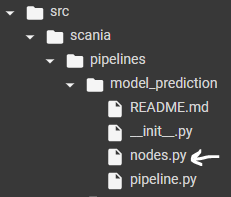

In [ ]:
from kedro.pipeline import Pipeline, node
from .nodes import pre_processing, prediction

def create_pipeline(**kwargs):
    return Pipeline(
            [
                node(func=pre_processing,inputs='raw_data',outputs='clean_data',name='pre_processing',),
                node(func=prediction, inputs='clean_data',outputs='predictions',name='prediction',)
            ]
            )

This creates a pipeline that connects the nodes/functions named preprocessing and prediction together. This code should be saved as pipeline.py in model_prediction folder

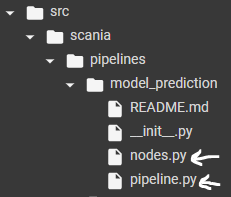

##Now that we have created the model pipeline, we have to register our pipeline in pipeline_registry.py file. 

In [ ]:
"""Project pipelines."""
from typing import Dict

from kedro.pipeline import Pipeline
from scania.pipelines import model_prediction

def register_pipelines() -> Dict[str, Pipeline]:
    """Register the project's pipelines.

    Returns:
        A mapping from a pipeline name to a ``Pipeline`` object.
    """
    return {"__default__": model_prediction.create_pipeline()}

This code will register the pipeline we created to kedro and this code should be saved as pipeline_registry.py 

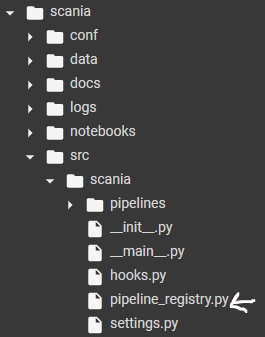

##Now we need to register our dataset name, type and filepath in catalog.yml file. All the datasets that will be used for the project should be mentioned here. The format for writing catalog.yml is shown below

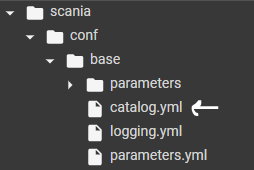

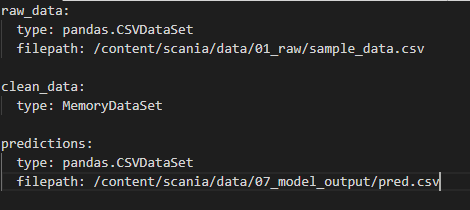

Also, all the necessary datasets and models required for data cleaning and making predictions should be saved in the data folder as shown below:

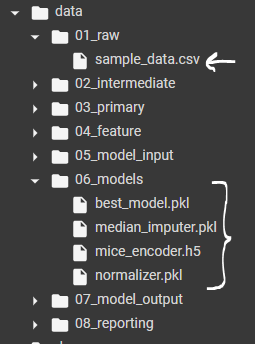

Now you can run the pipeline and the predictions will be saved in the filepath mentioned for predictions in catalog.yml file

In [20]:
!kedro run

2021-11-02 13:17:11,773 - root - INFO - Registered CLI hooks from 1 installed plugin(s): kedro-telemetry-0.1.2
2021-11-02 13:17:11,775 - kedro_telemetry.plugin - INFO - You have opted into product usage analytics.
2021-11-02 13:17:11,776 - kedro_telemetry.plugin - WARNING - Something went wrong with getting the username to send to Heap. Exception: [Errno 6] No such device or address
2021-11-02 13:17:12,061 - kedro.framework.session.store - INFO - `read()` not implemented for `BaseSessionStore`. Assuming empty store.
fatal: not a git repository (or any of the parent directories): .git
2021-11-02 13:17:12,070 - kedro.framework.session.session - WARNING - Unable to git describe /content/scania
2021-11-02 13:17:12,077 - root - INFO - ** Kedro project scania
/usr/local/lib/python3.7/dist-packages/tensorflow/python/autograph/impl/api.py:22: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp
2021-11-02 13:1

##Pipeline executed successfully! Lets see the predictions it made.


In [24]:
pred = pd.read_csv('/content/scania/data/07_model_output/pred.csv') #location where the model predictions were saved
pred

,index,prediction
0,0,failure
1,1,failure
2,2,failure
3,3,No failure
4,4,failure
5,5,failure
6,6,failure
7,7,failure
8,8,failure
9,9,failure


The model predicts whether there is failure/ no failure in APS system for the given data points